# APPLIED MACHINE LEARNING ASSIGNMENT 1

Lecturer's Name: Paul <br />
Student Name: Yap Li Xen (Kelvin) <br />
Student ID: P7414389 <br />
Class: DSAI/2021



# PART A: CLASSIFICATION

# Background

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.


One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


Complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# Steps

1. xxx
2. xxx
3. xxx

# Importing All Libraries

In [1581]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Data Importing

A first view of the dataset to understand the data structure and data value.

In [1582]:
df = pd.read_csv('data/train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


![](data/data_description.png)

In [1583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1584]:
# df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Embarked'], 1)
# df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1)
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], 1)
df.shape

(891, 7)

# Exploratory Data Analysis

In [1585]:
# sns.pairplot(df, hue="Survived", height=2)
# plt.show()

In [1586]:
# corr = df.corr()
# sns.heatmap(corr, cmap="YlGnBu",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values) 
# plt.show()

# Data Preparation

In [1587]:
# 1. SibSp & Parch
# print(df['SibSp'])
df['hasFamily'] = np.where((df['SibSp'] <= 0) & (df['Parch'] <= 0), 0, 1)

# print(df.head())
df = df.drop(['SibSp', 'Parch'], 1)
print(df.head())
df.shape

   Survived  Pclass     Sex   Age     Fare  hasFamily
0         0       3    male  22.0   7.2500          1
1         1       1  female  38.0  71.2833          1
2         1       3  female  26.0   7.9250          0
3         1       1  female  35.0  53.1000          1
4         0       3    male  35.0   8.0500          0


(891, 6)

In [1588]:
# 2. Group Fare
# bins=[0,10,20,40,60,80,100,200,600]
# labels=[0,1,2,3,4,5,6,7]
# df['Fare Group'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)
arr = np.array([0,10,20,40,60,80,100,200,600])
df['Fare Group'] = arr.searchsorted(df['Fare'])
df = df.drop('Fare', 1)
print(df.head())
df.shape

   Survived  Pclass     Sex   Age  hasFamily  Fare Group
0         0       3    male  22.0          1           1
1         1       1  female  38.0          1           5
2         1       3  female  26.0          0           1
3         1       1  female  35.0          1           4
4         0       3    male  35.0          0           1


(891, 6)

In [1589]:
# 3. Age (delete OR group)
# df.Age.replace('', np.nan, inplace=True)
# df = df.dropna()
# df.shape

bins=[0,3,13,20,60,120]
labels=['Baby','Children','Teenager','Adult','Elderly']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age Group'] = df['Age Group'].replace(np.nan, 'Unknown', regex=True)
df = df.drop('Age', 1)
df.shape

(891, 6)

In [1590]:
# 4. Sex (Encoding)
df = pd.get_dummies(df)
print(df.head())

# df = df.drop(['Sex_female', 'Embarked_C'], 1)
df = df.drop('Sex_female', 1)
print(df.head())

   Survived  Pclass  hasFamily  Fare Group  Sex_female  Sex_male  \
0         0       3          1           1           0         1   
1         1       1          1           5           1         0   
2         1       3          0           1           1         0   
3         1       1          1           4           1         0   
4         0       3          0           1           0         1   

   Age Group_Baby  Age Group_Children  Age Group_Teenager  Age Group_Adult  \
0               0                   0                   0                1   
1               0                   0                   0                1   
2               0                   0                   0                1   
3               0                   0                   0                1   
4               0                   0                   0                1   

   Age Group_Elderly  
0                  0  
1                  0  
2                  0  
3                  0  
4      

# Train Model

In [1591]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Logistic Regression

In [1592]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cg',multi_class='multinomial')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

## 2. K-Nearest Neighbour

In [1593]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

## 3. Navie Bayes

In [1594]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

## 4. Classification Tree

In [1595]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 5. Support Vector Classifier

In [1596]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

# Score and Evaluate Model

In [1597]:
y_predict = model.predict(X_train)
# cm = confusion_matrix(y_test, y_predict)
# print(cm)

In [1598]:
from sklearn.metrics import accuracy_score
print("Accuracy Score (Train Data): {:.2f}%".format(accuracy_score(y_train, y_predict)*100))

Accuracy Score (Train Data): 79.35%


In [1599]:
y_predict = model.predict(X_test)

In [1600]:
from sklearn.metrics import accuracy_score
print("Accuracy Score (Test Data): {:.2f}%".format(accuracy_score(y_test, y_predict)*100))

Accuracy Score (Test Data): 78.21%


In [1601]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[88 17]
 [22 52]]


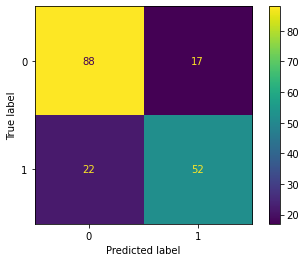

In [1602]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [1603]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



# References / Appendixes

1. https://www.kaggle.com/c/titanic/data
2. xx